In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('student_data.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## EDA

In [5]:
print(df.duplicated())
df.drop_duplicates(inplace= True)

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
#assign pass and fail to each students
df['avg_score']= (df['G1'] + df['G2'] + df['G3'])/ 3
df.drop(columns=['G1', 'G2', 'G3'], inplace= True)
df['P|F']= np.where(df['avg_score']<12, 'fail', 'pass')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg_score,P|F
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5.666667,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5.333333,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,8.333333,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,14.666667,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,8.666667,fail


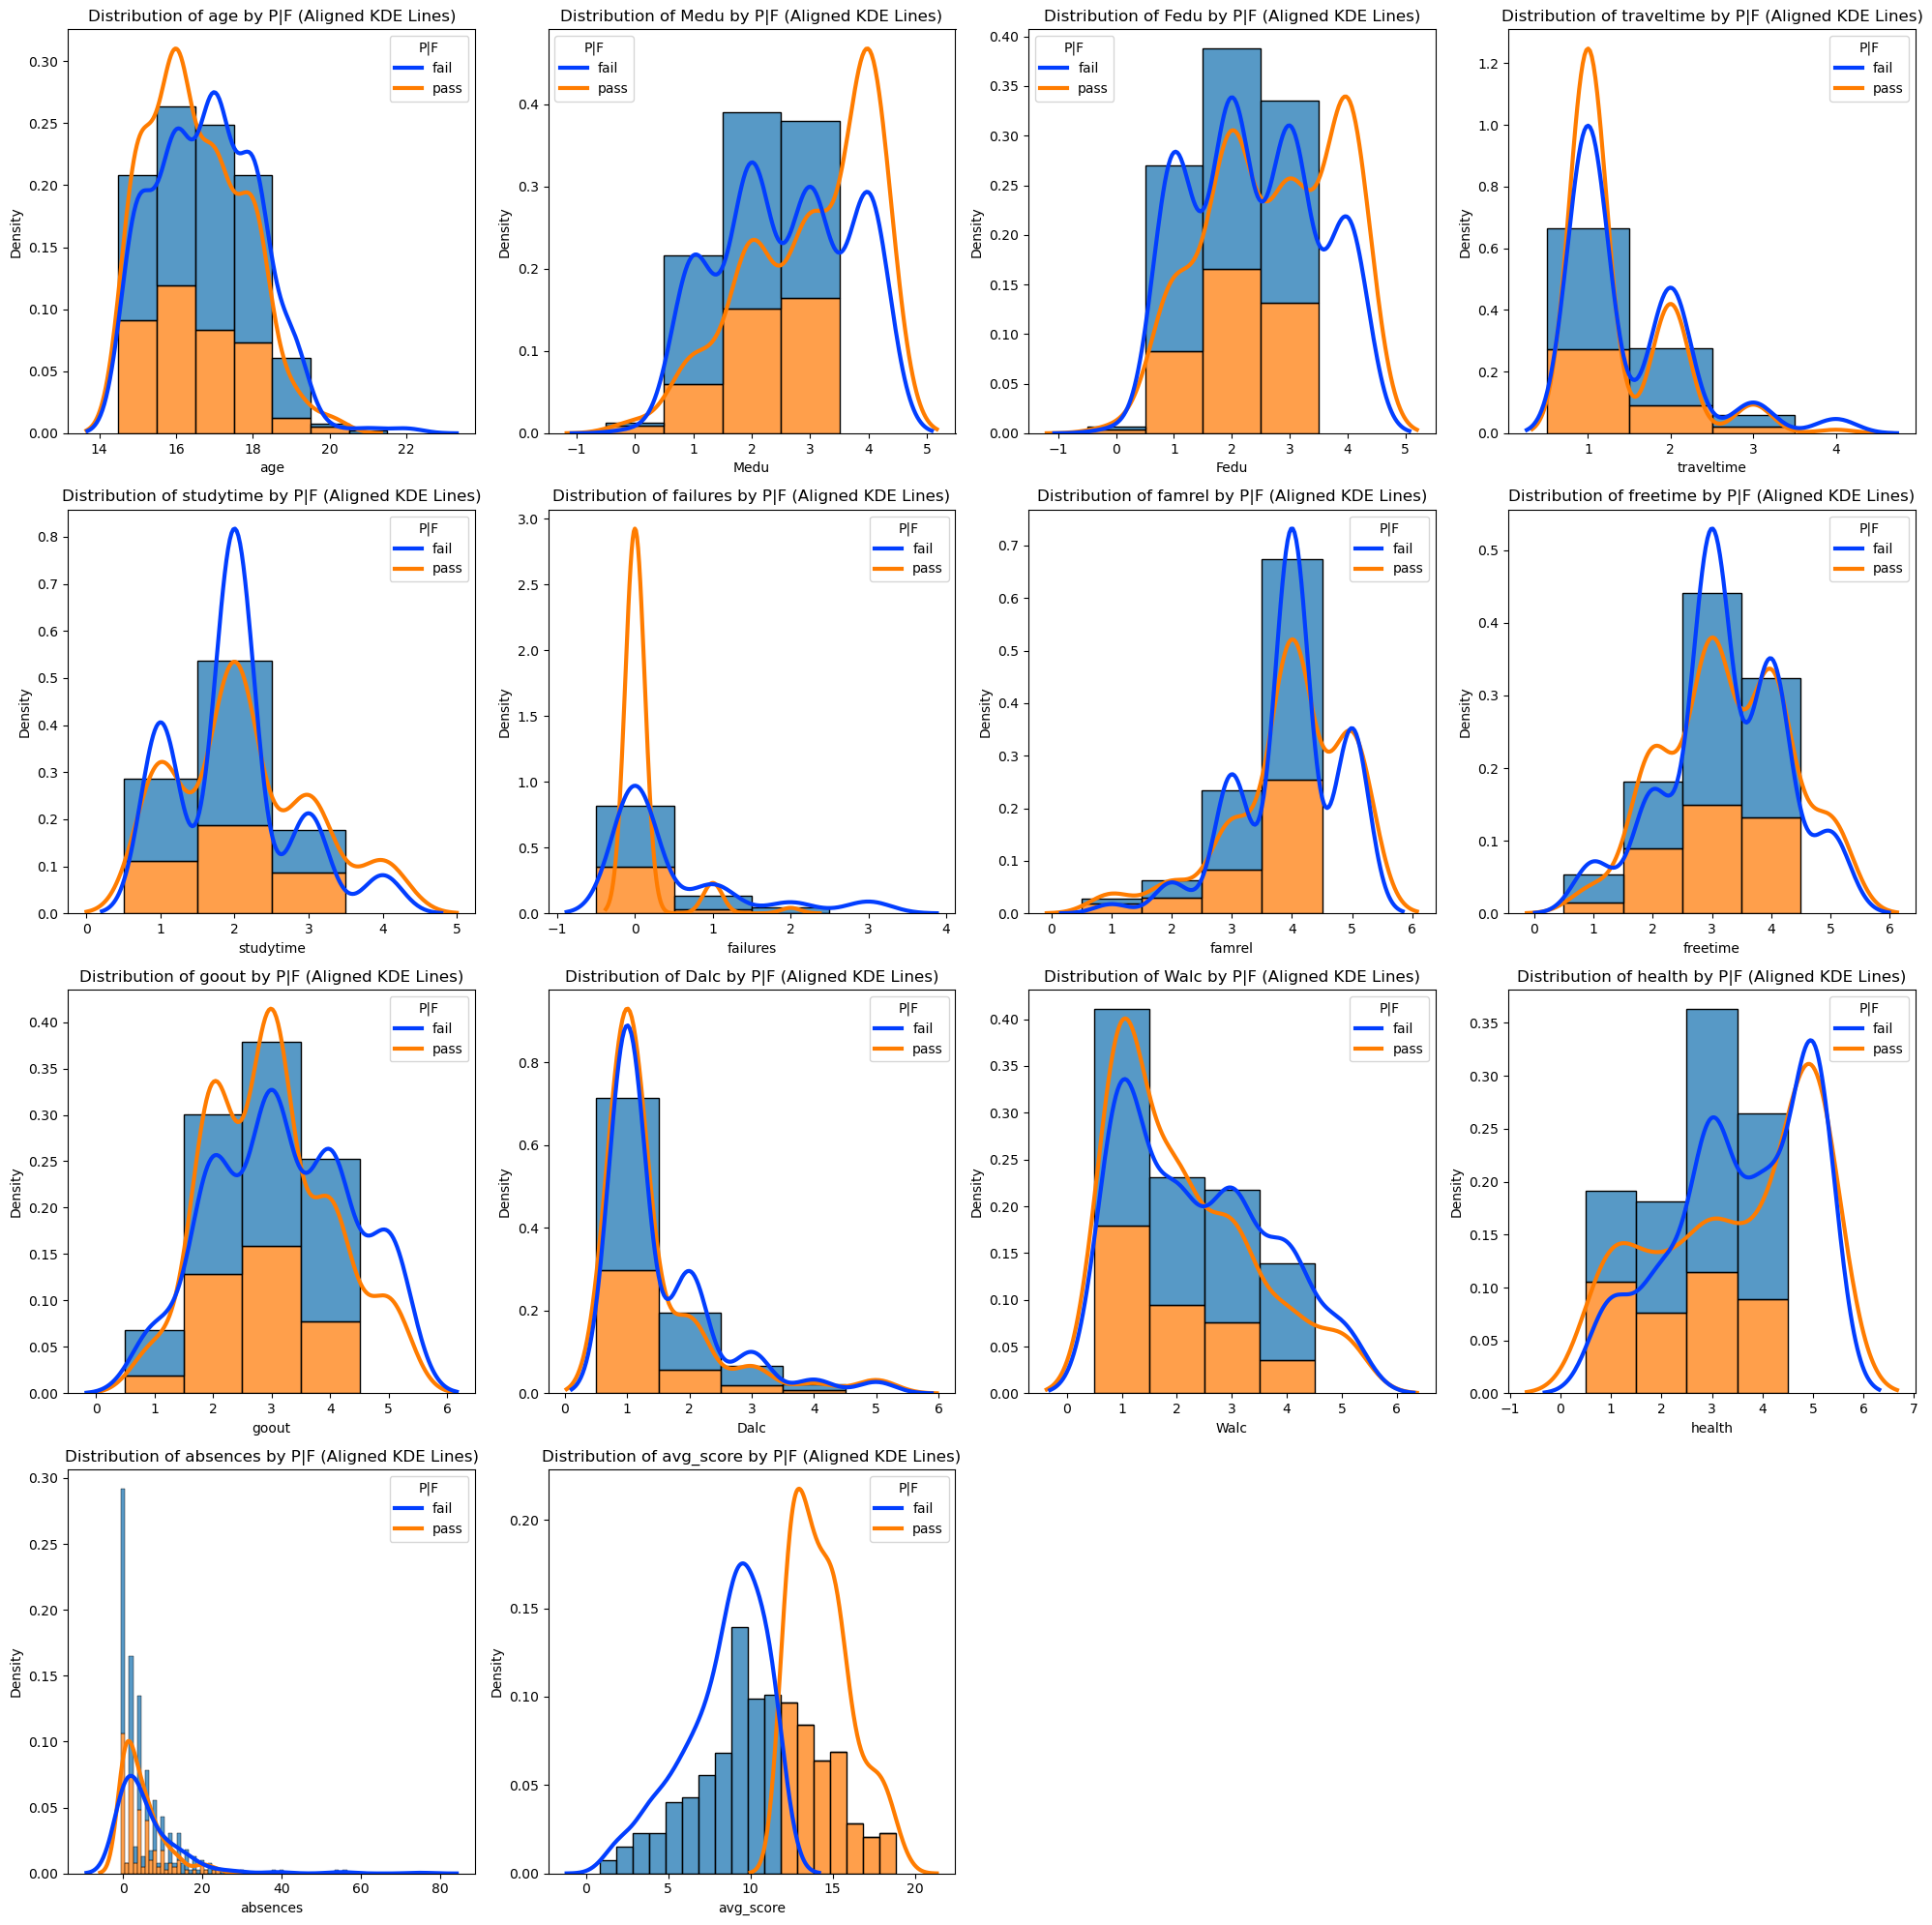

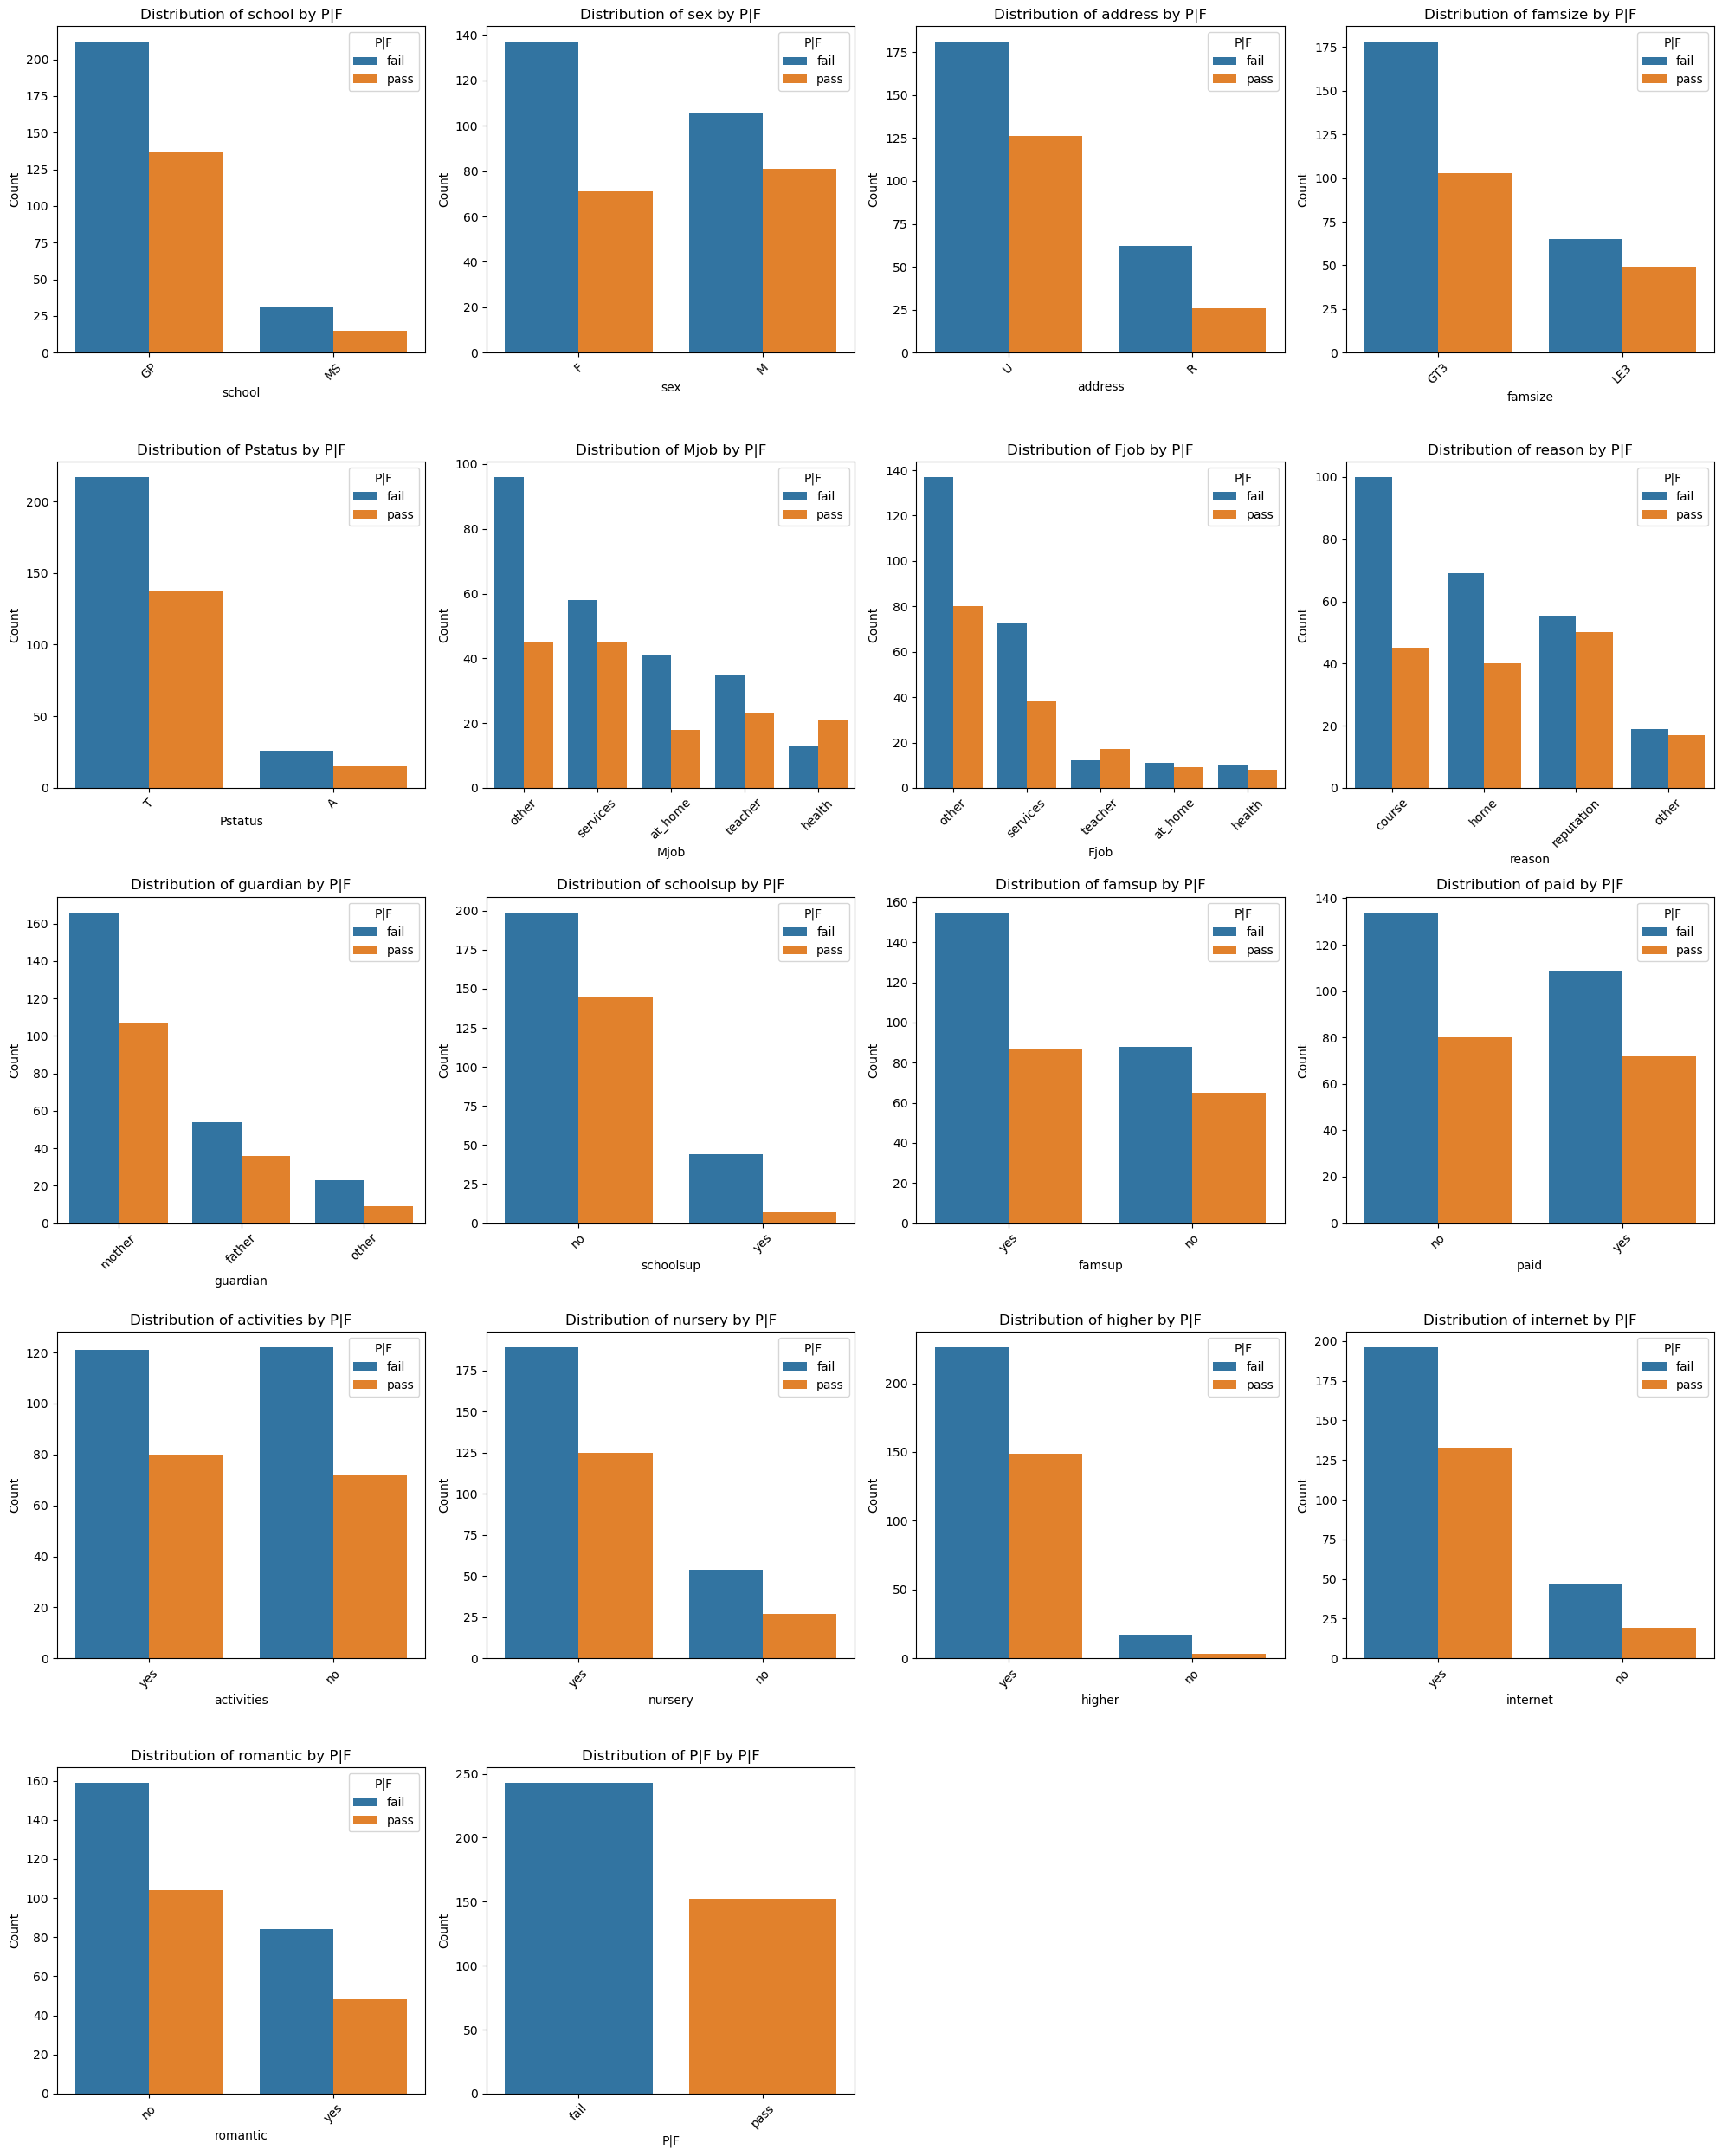

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and categorical columns
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
cat_cols = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]

# Calculate the number of rows required for subplots (4 plots per row)
num_rows = int(np.ceil(len(num_cols) / 4))
cat_rows = int(np.ceil(len(cat_cols) / 4))

# Plotting numerical variables grouped by 'P|F'
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(num_cols):
     # Plot the histogram as a density
    sns.histplot(data=df, x=column, hue='P|F', bins=np.arange(df[column].min(), df[column].max() + 1, 1) - 0.5, ax=axes[i], stat='density', kde=False, multiple='stack')
    # Add the KDE plots
    sns.kdeplot(data=df, x=column, hue='P|F', ax=axes[i], common_norm=False, fill=False, linewidth=3, palette="bright")
    axes[i].set_title(f'Distribution of {column} by P|F (Aligned KDE Lines)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plotting categorical variables grouped by 'P|F'
fig, axes = plt.subplots(cat_rows, 4, figsize=(20, 5 * cat_rows))
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, hue='P|F', order=df[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by P|F')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




### interesting findings

| **Variable**     | **Observation**                                                                                             | **Implication**                                                                                                 |
|-------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| `age`             | `Fail` group has a slightly broader distribution skewed toward younger ages compared to `pass`.   | Younger students may have a slightly higher likelihood of failing.                                           |
| `Medu`            | Higher maternal education (`Medu` >= 3) is more common in the `pass` group.                       | Maternal education level correlates positively with academic success.                                        |
| `Fedu`            | Similar trend as `Medu`, with higher paternal education levels in the `pass` group.               | Parental education levels are predictive of better academic outcomes.                                        |
| `failures`        | `Fail` group has a higher frequency of past failures.                                                     | Past failures are a strong negative predictor of academic performance.                                        |
| `studytime`       | `Pass` group shows a sharp peak at higher study times, while `fail` is more distributed.          | Increased study time strongly correlates with passing.                                                      |
| `goout`           | The `fail` group has a broader and higher density at higher values (`goout` >= 3).                | Higher frequency of going out may negatively impact academic performance.                                    | 
| `absences`        | `Fail` group shows a broader range and higher frequency of absences.                                       | Low attendance appears to negatively affect performance.                                                     |
| `schoolsup`       | `Fail` group has more students receiving school support.                                                  | Suggests school support is reactive, helping struggling students rather than guaranteeing success.            |
| `higher`          | Most students aiming for higher education (`yes`) are in the `pass` group.                                | Academic aspirations and success seem to be linked.                                                          |
| `internet`        | Students with internet access (`yes`) are more likely to pass.                                            | Availability of resources like the internet might support academic success.                                   |


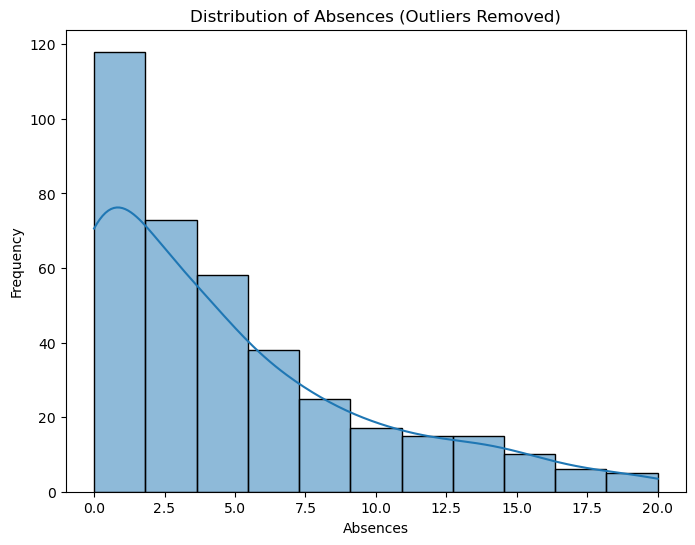

In [10]:
# fixing the outliers for the abscence column
# Define a threshold for outlier removal based on the IQR method
q1 = df['absences'].quantile(0.25)
q3 = df['absences'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df= df[(df['absences'] >= lower_bound) & (df['absences'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.histplot(df['absences'], kde=True, bins='auto') 
plt.title('Distribution of Absences (Outliers Removed)')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.show()





## data preprocessing

### interaction term

###

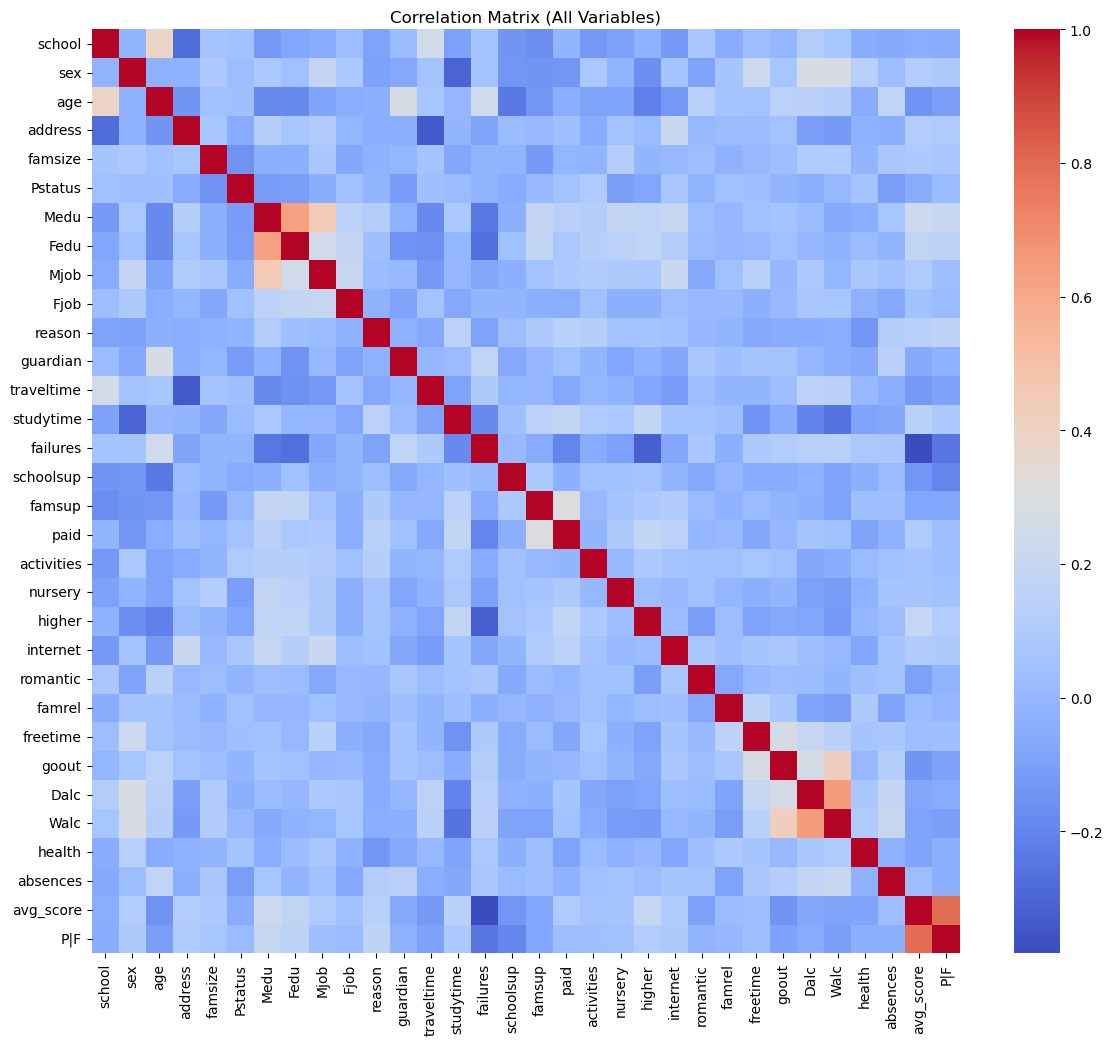

In [11]:
from sklearn.preprocessing import LabelEncoder
# Encode all categorical variables to prepare for a full correlation matrix
encoded_data = df.copy()

for column in encoded_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])

# Compute the correlation matrix for all variables
full_correlation_matrix = encoded_data.corr()

# Plot the full correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(full_correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (All Variables)')
plt.show()



In [12]:
# Identify correlations greater than 0.5 or less than -0.5 (absolute value > 0.6)
high_correlation_pairs = full_correlation_matrix.unstack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter for correlations above 0.6 (excluding self-correlations)
high_correlation_pairs = high_correlation_pairs[
    (high_correlation_pairs['Correlation'].abs() > 0.4) & 
    (high_correlation_pairs['Variable 1'] != high_correlation_pairs['Variable 2'])
]

# Sort by correlation value
high_correlation_pairs = high_correlation_pairs.sort_values(by='Correlation', ascending=False)
high_correlation_pairs

,Variable 1,Variable 2,Correlation
991,avg_score,P|F,0.791609
1022,P|F,avg_score,0.791609
859,Dalc,Walc,0.647852
890,Walc,Dalc,0.647852
199,Medu,Fedu,0.628656
230,Fedu,Medu,0.628656
200,Medu,Mjob,0.450505
262,Mjob,Medu,0.450505
827,goout,Walc,0.424210
889,Walc,goout,0.424210


In [13]:
# create interaction term for variables with high correlation score > 0.4
# Create interaction terms for selected variable pairs
df['Dalc_Walc'] = df['Dalc'] * df['Walc']
df['Medu_Fedu'] = df['Medu'] * df['Fedu']
df['Medu_Mjob'] = df['Medu'] * LabelEncoder().fit_transform(df['Mjob'])
df['goout_Walc'] = df['goout'] * df['Walc']




In [14]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,avg_score,P|F,Dalc_Walc,Medu_Fedu,Medu_Mjob,goout_Walc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5.666667,fail,1,16,0,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5.333333,fail,1,1,0,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,8.333333,fail,6,1,0,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,14.666667,pass,1,8,4,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,8.666667,fail,2,9,6,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 394
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      380 non-null    object 
 1   sex         380 non-null    object 
 2   age         380 non-null    int64  
 3   address     380 non-null    object 
 4   famsize     380 non-null    object 
 5   Pstatus     380 non-null    object 
 6   Medu        380 non-null    int64  
 7   Fedu        380 non-null    int64  
 8   Mjob        380 non-null    object 
 9   Fjob        380 non-null    object 
 10  reason      380 non-null    object 
 11  guardian    380 non-null    object 
 12  traveltime  380 non-null    int64  
 13  studytime   380 non-null    int64  
 14  failures    380 non-null    int64  
 15  schoolsup   380 non-null    object 
 16  famsup      380 non-null    object 
 17  paid        380 non-null    object 
 18  activities  380 non-null    object 
 19  nursery     380 non-null    object

### scaling variables

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

# Scale numerical variables
scaler = StandardScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(df[numerical_vars]), columns=numerical_vars)

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output for recent versions
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(df[categorical_vars]),
                                         columns=encoder.get_feature_names_out(categorical_vars))

# Combine scaled numerical and encoded categorical data
scaled_data = pd.concat([scaled_numerical_data, encoded_categorical_data], axis=1)


avg_score_col = scaled_data.pop('avg_score')  # Remove 'avg_score' from the DataFrame
scaled_data['avg_score'] = avg_score_col 

# Display the first few rows of the processed dataset
scaled_data.head()




,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,P|F_pass,avg_score
0,1.043881,1.158226,1.366638,0.789764,-0.049829,-0.437358,0.058183,-0.265025,0.803374,-0.535897,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.357256
1,0.258386,-1.569827,-1.381100,-0.632560,-0.049829,-0.437358,1.163656,-0.265025,-0.097163,-0.535897,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.447344
2,-1.312603,-1.569827,-1.381100,-0.632560,-0.049829,3.583512,0.058183,-0.265025,-0.997700,0.576895,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.636547
3,-1.312603,1.158226,-0.465187,-0.632560,1.133610,-0.437358,-1.047291,-1.282294,-0.997700,-0.535897,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.075136
4,-0.527108,0.248875,0.450725,-0.632560,-0.049829,-0.437358,0.058183,-0.265025,-0.997700,-0.535897,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.546458


In [26]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                380 non-null    float64
 1   Medu               380 non-null    float64
 2   Fedu               380 non-null    float64
 3   traveltime         380 non-null    float64
 4   studytime          380 non-null    float64
 5   failures           380 non-null    float64
 6   famrel             380 non-null    float64
 7   freetime           380 non-null    float64
 8   goout              380 non-null    float64
 9   Dalc               380 non-null    float64
 10  Walc               380 non-null    float64
 11  health             380 non-null    float64
 12  absences           380 non-null    float64
 13  Dalc_Walc          380 non-null    float64
 14  Medu_Fedu          380 non-null    float64
 15  Medu_Mjob          380 non-null    float64
 16  goout_Walc         380 non

In [21]:
scaled_data.to_csv('preprossed_data.csv')

In [28]:
 # Drop 'avg_score' and 'P|F' columns from the DataFrame
X = scaled_data.drop(columns=['avg_score', 'P|F_pass'])

# Assign 'P|F' to y for logistic regression
y_logistic = scaled_data['P|F_pass']

# Assign 'avg_score' to y for linear regression
y_linear = scaled_data['avg_score']

# Display the shapes of the resulting datasets
print("X shape:", X.shape)
print("y_logistic shape:", y_logistic.shape)
print("y_linear shape:", y_linear.shape)



X shape: (380, 43)
y_logistic shape: (380,)
y_linear shape: (380,)


## PCA (optional)

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA-transformed data
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Display explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.183276  , 0.156839  , 0.0610792 , 0.0561805 , 0.05430771,
       0.04753513, 0.04404581, 0.0420206 , 0.0371566 , 0.03545071,
       0.03349737, 0.02896139, 0.02698967, 0.01848079, 0.01624023,
       0.01385084, 0.01252214, 0.0114002 , 0.01073528, 0.01020149,
       0.00933711, 0.00909606, 0.00848059, 0.0074694 , 0.00675649,
       0.00653154, 0.00597475])

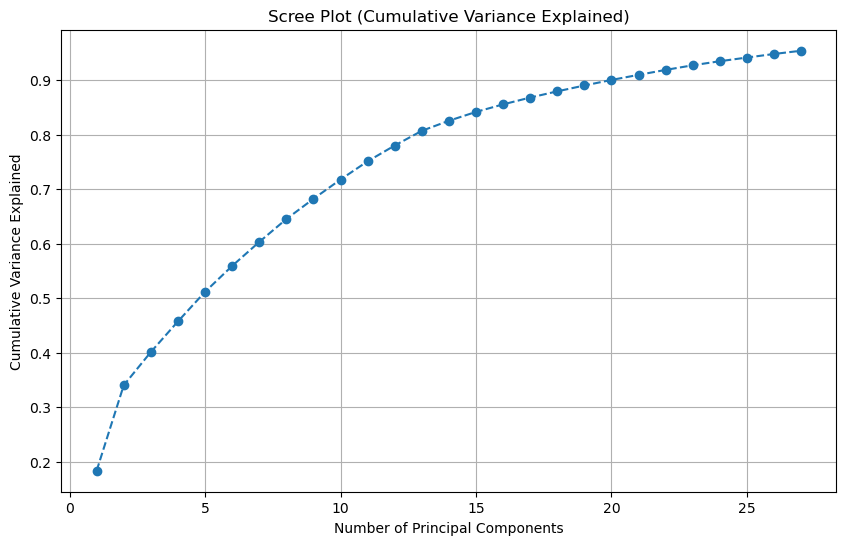

array([0.183276  , 0.34011499, 0.40119419, 0.45737469, 0.5116824 ,
       0.55921753, 0.60326335, 0.64528394, 0.68244054, 0.71789125,
       0.75138863, 0.78035001, 0.80733968, 0.82582047, 0.8420607 ,
       0.85591154, 0.86843368, 0.87983389, 0.89056916, 0.90077065,
       0.91010776, 0.91920382, 0.92768441, 0.93515382, 0.94191031,
       0.94844185, 0.95441661])

In [23]:


# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot (Cumulative Variance Explained)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

# Display cumulative variance
cumulative_variance


In [24]:
# Select the top 15 components
top_15_pca_data = pca_data[:, :15]

# Create a DataFrame for the selected components
pca_columns_top_15 = [f'PC{i+1}' for i in range(15)]
top_15_pca_df = pd.DataFrame(top_15_pca_data, columns=pca_columns_top_15)

top_15_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.071256,0.558520,-1.349904,-0.630713,1.257643,-1.264624,0.555917,-0.763948,1.087675,-1.301091,-0.018607,-1.219768,-0.791177,0.002840,-0.895842
1,-0.373537,-3.184086,-0.605563,0.716405,0.045876,-0.335084,-0.432568,-0.007679,-0.343963,-0.423206,1.389280,-0.790244,0.092320,-0.137872,-0.263349
2,1.660500,-2.732099,-0.373474,-0.941689,0.401945,1.349171,-1.208551,0.260739,-0.778782,1.175380,1.046245,1.740988,-1.763628,0.887861,0.448830
3,-2.580533,-0.122690,1.334756,-0.807036,-0.428371,-0.036413,-0.904012,1.501279,-0.080454,0.453100,-0.751643,0.525005,-0.258530,0.137948,-0.737104
4,-1.272880,-0.173074,-0.497971,-0.723208,-0.621573,0.143134,-0.579840,0.855656,0.163116,-0.364911,0.496237,-0.926467,-0.051922,0.714425,0.360015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,5.890355,0.763885,-1.000811,1.477743,1.153018,1.387062,1.214403,1.402926,-1.744145,-0.004984,-0.040043,-0.085607,-1.056804,-0.360172,0.170561
376,3.611545,1.035664,2.224514,0.043852,-0.013778,0.380407,-0.140620,-1.803416,-0.747352,0.598449,-1.494277,0.659453,1.546020,-0.919043,-1.132514
377,3.908274,-2.642611,-2.374807,1.161012,0.951205,1.919801,1.613299,-0.349607,-2.378411,-0.693216,-0.934081,-0.234751,-0.611419,1.423898,0.543089
378,1.891750,0.135291,0.334125,-1.346842,-2.021967,1.269723,3.085456,0.094293,-0.448142,0.179864,-0.246404,-0.831509,1.024643,0.080221,0.651053


In [25]:
top_15_pca_df.to_csv('preprossed_data_with_PCA.csv')